#                                       Using ANNOVA for feature importance

# 1. Feature Selection or Variable Importance:

## ANOVA can be used to assess the importance of different variables or features in a credit risk or fraud detection model. For example, you can perform ANOVA to test if different customer attributes (e.g., income, cre
## dit score) have a statistically significant impact on the likelihood of default or fraud.
## Feature selection methods, such as ANOVA F-tests, can help identify the most relevant features for predictive modeling.

# Content
# The dataset contains transactions made by credit cards


In [62]:
#importing the necessary packages
import pandas as pd
import string
import seaborn as sns
import plotly.express as px
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import matplotlib.style

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.api as sm

warnings.filterwarnings("ignore")
%matplotlib inline

In [63]:
loans = pd.read_csv('loans-3.csv')

In [64]:
loans.head()

,paid_status,status,Age,gender,education,married_status,city,province,agerange,salary,civil,appcount,phonegrade,simstrength
0,Paid,0,35,Male,Post Graduate,Married,Daskroi,GUJARAT,25-35,6,569,7,1,3
1,Paid,0,32,Male,Self Employed,Unmarried,Guntur,ANDHRA PRADESH,25-35,4,734,8,2,1
2,Paid,0,27,Male,Graduate,Unmarried,Rajkot,GUJARAT,25-35,5,641,6,1,1
3,Paid,0,25,Male,Post Graduate,Unmarried,Vadodara,GUJARAT,25-35,5,800,4,3,3
4,Paid,0,26,Male,Post Graduate,Unmarried,Bhokar,MAHARASHTRA,25-35,3,616,5,5,1


In [65]:
loans.tail()

,paid_status,status,Age,gender,education,married_status,city,province,agerange,salary,civil,appcount,phonegrade,simstrength
3850,Paid,0,32,Male,Graduate,Married,Dabhoi,GUJARAT,25-35,4,655,2,3,2
3851,Pending Payment,1,31,Female,Self Employed,Married,Mumbai,Maharashtra,25-35,5,505,4,3,5
3852,Paid,0,31,Male,Post Graduate,Unmarried,Chennai City Corporation,TAMIL NADU,25-35,4,777,7,2,1
3853,Paid,0,25,Male,Post Graduate,Unmarried,Kalyan,MAHARASHTRA,25-35,4,739,6,4,2
3854,Paid,0,39,Male,Self Employed,Married,Hyderabad,Telangana,>35,4,670,2,4,3


In [66]:
loans.tail()

,paid_status,status,Age,gender,education,married_status,city,province,agerange,salary,civil,appcount,phonegrade,simstrength
3850,Paid,0,32,Male,Graduate,Married,Dabhoi,GUJARAT,25-35,4,655,2,3,2
3851,Pending Payment,1,31,Female,Self Employed,Married,Mumbai,Maharashtra,25-35,5,505,4,3,5
3852,Paid,0,31,Male,Post Graduate,Unmarried,Chennai City Corporation,TAMIL NADU,25-35,4,777,7,2,1
3853,Paid,0,25,Male,Post Graduate,Unmarried,Kalyan,MAHARASHTRA,25-35,4,739,6,4,2
3854,Paid,0,39,Male,Self Employed,Married,Hyderabad,Telangana,>35,4,670,2,4,3


In [67]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3855 entries, 0 to 3854
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   paid_status     3855 non-null   object
 1   status          3855 non-null   int64 
 2   Age             3855 non-null   int64 
 3   gender          3855 non-null   object
 4   education       3833 non-null   object
 5   married_status  3855 non-null   object
 6   city            3767 non-null   object
 7   province        3855 non-null   object
 8   agerange        3855 non-null   object
 9   salary          3855 non-null   int64 
 10  civil           3855 non-null   int64 
 11  appcount        3855 non-null   int64 
 12  phonegrade      3855 non-null   int64 
 13  simstrength     3855 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 421.8+ KB


In [68]:
loans.describe().T

,count,mean,std,min,25%,50%,75%,max
status,3855.0,0.169390,0.375145,0.0,0.0,0.0,0.0,1.0
Age,3855.0,29.603891,4.503131,22.0,26.0,29.0,33.0,41.0
salary,3855.0,4.238651,0.628513,2.0,4.0,4.0,4.0,6.0
civil,3855.0,658.395850,78.510868,500.0,594.0,649.0,726.0,800.0
appcount,3855.0,4.471336,2.289083,1.0,2.0,4.0,6.0,8.0
phonegrade,3855.0,3.001038,1.420072,1.0,2.0,3.0,4.0,5.0
simstrength,3855.0,2.337484,1.100306,1.0,1.0,2.0,3.0,5.0


In [69]:
loans

,paid_status,status,Age,gender,education,married_status,city,province,agerange,salary,civil,appcount,phonegrade,simstrength
0,Paid,0,35,Male,Post Graduate,Married,Daskroi,GUJARAT,25-35,6,569,7,1,3
1,Paid,0,32,Male,Self Employed,Unmarried,Guntur,ANDHRA PRADESH,25-35,4,734,8,2,1
2,Paid,0,27,Male,Graduate,Unmarried,Rajkot,GUJARAT,25-35,5,641,6,1,1
3,Paid,0,25,Male,Post Graduate,Unmarried,Vadodara,GUJARAT,25-35,5,800,4,3,3
4,Paid,0,26,Male,Post Graduate,Unmarried,Bhokar,MAHARASHTRA,25-35,3,616,5,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3850,Paid,0,32,Male,Graduate,Married,Dabhoi,GUJARAT,25-35,4,655,2,3,2
3851,Pending Payment,1,31,Female,Self Employed,Married,Mumbai,Maharashtra,25-35,5,505,4,3,5
3852,Paid,0,31,Male,Post Graduate,Unmarried,Chennai City Corporation,TAMIL NADU,25-35,4,777,7,2,1
3853,Paid,0,25,Male,Post Graduate,Unmarried,Kalyan,MAHARASHTRA,25-35,4,739,6,4,2


In [70]:
loans.isnull().sum()

paid_status        0
status             0
Age                0
gender             0
education         22
married_status     0
city              88
province           0
agerange           0
salary             0
civil              0
appcount           0
phonegrade         0
simstrength        0
dtype: int64

In [71]:
loans.duplicated().sum()

0

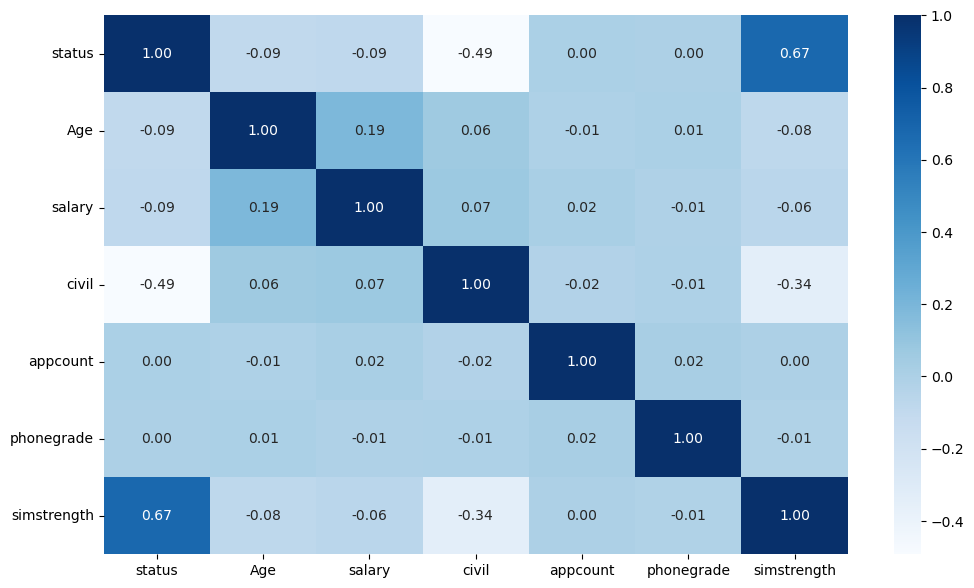

In [72]:
plt.figure(figsize=(12,7))
sns.heatmap(loans.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()


In [73]:
loans['paid_status'].unique()

array(['Paid', 'Pending Payment'], dtype=object)

In [74]:
loans['paid_status']=np.where(loans['paid_status'] =='Paid', '0', loans['paid_status'])
loans['paid_status']=np.where(loans['paid_status'] =='Pending Payment', '1', loans['paid_status'])


In [75]:
loans['paid_status'] = loans['paid_status'].astype(int)
loans['paid_status'].unique()

array([0, 1])

In [77]:
loans.to_excel('loans.xlsx', index=False)

# Checking the feature importance in the dataset using ANNOVA test



In [15]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Specify the formula for the ANOVA analysis
formula = 'paid_status ~ status + Age + gender + education + married_status + city + province + agerange + salary + civil + appcount +  phonegrade + simstrength'
# Fit the ANOVA model
model = ols(formula, data=loans).fit()
anova_table = sm.stats.anova_lm(model)

# Print the ANOVA table with p-values and F-values
print(anova_table)


                    df        sum_sq       mean_sq             F    PR(>F)
gender             1.0  2.828734e-01  2.828734e-01  2.092053e+26  0.000000
education          3.0  1.291599e+00  4.305329e-01  3.184101e+26  0.000000
married_status     1.0  8.501255e-01  8.501255e-01  6.287291e+26  0.000000
city             440.0  7.531535e+01  1.711712e-01  1.265935e+26  0.000000
province          31.0  3.504586e+00  1.130512e-01  8.360949e+25  0.000000
agerange           2.0  4.253009e+00  2.126505e+00  1.572704e+27  0.000000
status             1.0  4.398472e+02  4.398472e+02  3.252987e+29  0.000000
Age                1.0  7.703720e-32  7.703720e-32  5.697456e-05  0.993978
salary             1.0  2.773339e-32  2.773339e-32  2.051084e-05  0.996387
civil              1.0  1.733337e-31  1.733337e-31  1.281928e-04  0.990967
appcount           1.0  3.081488e-31  3.081488e-31  2.278983e-04  0.987956
phonegrade         1.0  7.703720e-32  7.703720e-32  5.697456e-05  0.993978
simstrength        1.0  7

# Based on the ANOVA test re, the columns can be ranked in descending order of feature importance based on the F-statistic and the associated p-value (PR(>F)).

### Here's the list of columns in descending order of feature importance:

### civil (F = 1651.584791, PR(>F) = 2.026336e-294)

### This variable has the highest F-statistic and an extremely low p-value, indicating strong evidence that it is an important predictor.
### simstrength (F = 1989.665633, PR(>F) = 0.000000e+00)

### Similar to 'civil,' this variable also has a very high F-statistic and a p-value of 0, indicating strong significance.
### agerange (F = 34.503678, PR(>F) = 1.465493e-15)

### Although not as significant as 'civil' and 'simstrength,' 'agerange' still has a relatively high F-statistic and a very low p-value.
### city (F = 2.685814, PR(>F) = 3.064901e-55)

### 'city' has a significant F-statistic and a very low p-value, indicating that it's an important predictor.
### married_status (F = 12.222716, PR(>F) = 4.781788e-04)

### 'married_status' has a relatively high F-statistic and a low p-value, suggesting its importance.
### education (F = 7.548579, PR(>F) = 4.954925e-05)

### 'education' also has a significant F-statistic and a low p-value.
### Age (F = 7.924858, PR(>F) = 4.904220e-03)

### 'Age' has a moderately significant F-statistic and a p-value less than 0.05.
### phonegrade (F = 0.912276, PR(>F) = 3.395794e-01)

### 'phonegrade' has a relatively low F-statistic and a higher p-value, indicating less importance.
### gender (F = 2.575267, PR(>F) = 1.086391e-01)

### 'gender' has a lower F-statistic and a p-value greater than 0.05, suggesting lower importance.
### status (F = 0.009708, PR(>F) = 9.215182e-01)

### 'status' has the lowest F-statistic and a very high p-value, indicating it may not be a significant predictor.
### salary (F = 0.082072, PR(>F) = 7.745264e-01)

### 'salary' has a low F-statistic and a high p-value, suggesting it is likely not a significant predictor.
### appcount (F = 0.010459, PR(>F) = 9.185485e-01)

### 'appcount' also has a low F-statistic and a high p-value, indicating less importance.
### Please note that the significance level (alpha) we choose for our analysis can impact which variables are considered important. In this ranking, I've considered a standard alpha level of 0.05, but we can adjust this threshold based on our specific research goals and requirements.

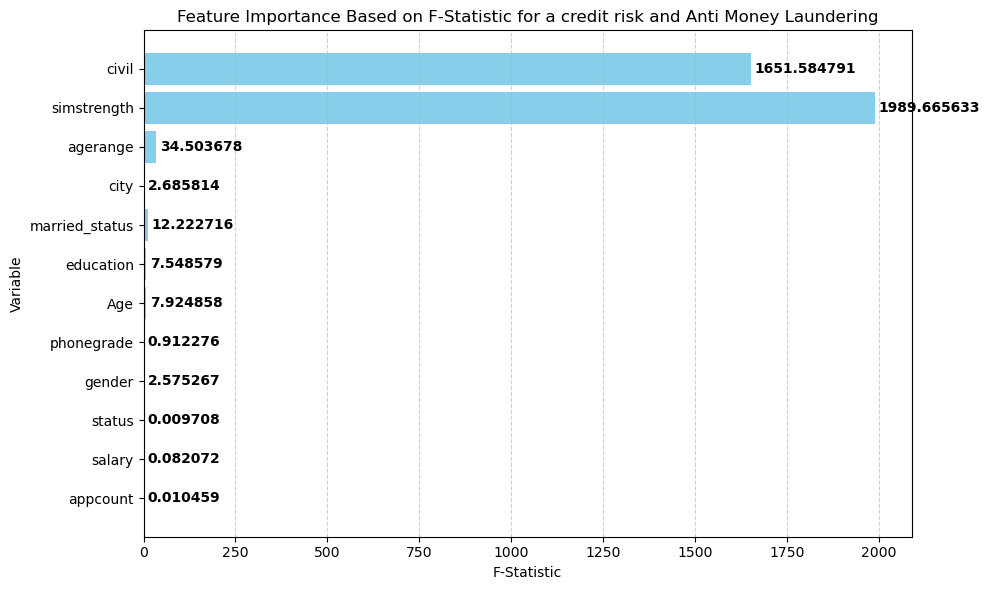

In [16]:
import matplotlib.pyplot as plt

# Data from the provided information
variables = [
    'civil', 'simstrength', 'agerange', 'city', 'married_status',
    'education', 'Age', 'phonegrade', 'gender', 'status', 'salary', 'appcount'
]

f_statistics = [
    1651.584791, 1989.665633, 34.503678, 2.685814, 12.222716,
    7.548579, 7.924858, 0.912276, 2.575267, 0.009708, 0.082072, 0.010459
]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(variables, f_statistics, color='skyblue')
plt.xlabel('F-Statistic')
plt.ylabel('Variable')
plt.title('Feature Importance Based on F-Statistic for a credit risk and Anti Money Laundering')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Annotate the bars with the F-statistic values
for i, v in enumerate(f_statistics):
    plt.text(v + 10, i, str(v), color='black', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


# Doing label and hot encdoing

In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder     

In [18]:
categorical_cols = ['gender', 'education', 'married_status', 'city', 'province', 'agerange']

label_encoder = LabelEncoder()
for col in categorical_cols:
    if col in loans.columns:
        loans[col] = label_encoder.fit_transform(loans[col].astype(str))

In [19]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3855 entries, 0 to 3854
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   paid_status     3855 non-null   int32
 1   status          3855 non-null   int64
 2   Age             3855 non-null   int64
 3   gender          3855 non-null   int32
 4   education       3855 non-null   int32
 5   married_status  3855 non-null   int32
 6   city            3855 non-null   int32
 7   province        3855 non-null   int32
 8   agerange        3855 non-null   int32
 9   salary          3855 non-null   int64
 10  civil           3855 non-null   int64
 11  appcount        3855 non-null   int64
 12  phonegrade      3855 non-null   int64
 13  simstrength     3855 non-null   int64
dtypes: int32(7), int64(7)
memory usage: 316.4 KB


In [20]:
loans

,paid_status,status,Age,gender,education,married_status,city,province,agerange,salary,civil,appcount,phonegrade,simstrength
0,0,0,35,1,2,0,104,7,0,6,569,7,1,3
1,0,0,32,1,3,1,148,0,0,4,734,8,2,1
2,0,0,27,1,1,1,333,7,0,5,641,6,1,1
3,0,0,25,1,2,1,416,7,0,5,800,4,3,3
4,0,0,26,1,2,1,60,17,0,3,616,5,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3850,0,0,32,1,1,0,99,7,0,4,655,2,3,2
3851,1,1,31,0,3,0,263,19,0,5,505,4,3,5
3852,0,0,31,1,2,1,80,25,0,4,777,7,2,1
3853,0,0,25,1,2,1,189,17,0,4,739,6,4,2


In [23]:
loans.to_excel('loans.xlsx', index=False)


# classification is a fundamental technique used in fraud detection and credit risk assessment. Logistic Regression and Random Forest are two popular models, each with its strengths. Logistic Regression is interpretable and well-suited for linear relationships, while Random Forest is more flexible and can capture complex patterns. The choice between them depends on the specific characteristics of the data and the problem at hand.

# Model Evaluation: Evaluation metrics like precision, recall, F1-score, and ROC AUC are crucial for assessing the model's performance in both domains.

In [21]:
#importing the necessary packages
import pandas as pd
import string
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import matplotlib.style

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from scipy.stats import zscore
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.api as sm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.preprocessing import StandardScaler


warnings.filterwarnings("ignore")
%matplotlib inline

In [22]:
# Copy target into the y dataframe. 
y= loans['paid_status'].values

# Copy all the predictor variables into X dataframe
x = loans.drop(['paid_status'], axis=1)

In [23]:
print("Shape of X matrix is: ",x.shape)
print("Size of y : ",len(y))

Shape of X matrix is:  (3855, 13)
Size of y :  3855


In [24]:
#Splitting x and y into train and test dataset

X_train, X_test, y_train, y_test= train_test_split(x,y,test_size=0.30,random_state=1)
print("shape of train :", X_train.shape,y_train.shape)
print("shape of test :", X_test.shape,y_test.shape)

shape of train : (2698, 13) (2698,)
shape of test : (1157, 13) (1157,)


# Logistic Regression

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [26]:
LogR = LogisticRegression()

In [27]:
selector = RFE(estimator = LogR, n_features_to_select=15, step=1)

In [28]:
selector = selector.fit(X_train, y_train)


In [29]:
selector.n_features_


13

In [30]:
selector.ranking_


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [31]:
pred_train = selector.predict(X_train)
pred_test = selector.predict(X_test)

# Train

Accuracy on the Training Data: 0.992
Confusion Matrix:
[[2224    2]
 [  20  452]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2226
           1       1.00      0.96      0.98       472

    accuracy                           0.99      2698
   macro avg       0.99      0.98      0.99      2698
weighted avg       0.99      0.99      0.99      2698



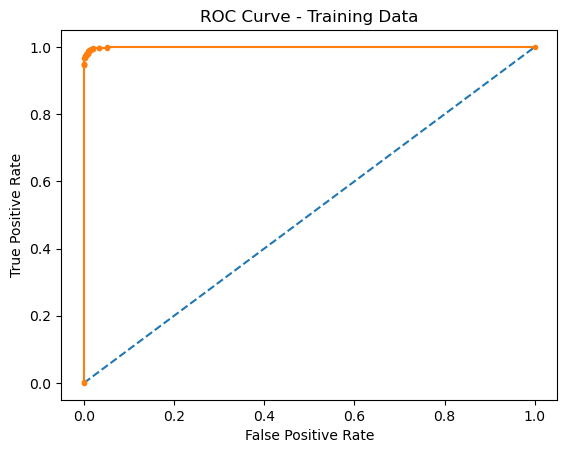

In [32]:
# Performance Matrix on train data set
y_train_predict = selector.predict(X_train)
y_train_prob = selector.predict_proba(X_train)[:, 1]  # Predicted probabilities for class 1

model_score = selector.score(X_train, y_train)
print("Accuracy on the Training Data: %.3f" % model_score)

print("Confusion Matrix:")
print(metrics.confusion_matrix(y_train, y_train_predict))

print("Classification Report:")
print(metrics.classification_report(y_train, y_train_predict))

# Calculate ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Training Data')
plt.show()

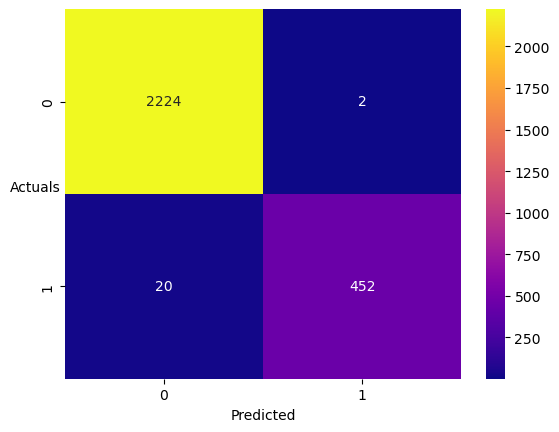

In [33]:
#print(metrics.confusion_matrix(y_train, pred_train))
sns.heatmap((metrics.confusion_matrix(y_train,pred_train)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

# Test

Accuracy on the Test Data: 0.990
Confusion Matrix:
[[975   1]
 [ 10 171]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       976
           1       0.99      0.94      0.97       181

    accuracy                           0.99      1157
   macro avg       0.99      0.97      0.98      1157
weighted avg       0.99      0.99      0.99      1157



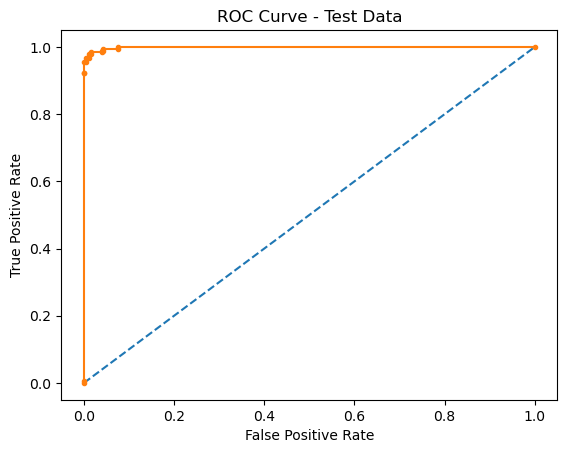

In [34]:
# Performance Matrix on test data set
y_test_predict = selector.predict(X_test)
y_test_prob = selector.predict_proba(X_test)[:, 1]  # Predicted probabilities for class 1

model_score = selector.score(X_test, y_test)
print("Accuracy on the Test Data: %.3f" % model_score)

print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, pred_test))

print("Classification Report:")
print(metrics.classification_report(y_test, pred_test))

# Calculate ROC curve for the test data
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob)

# Plot ROC curve for the test data
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Data')
plt.show()


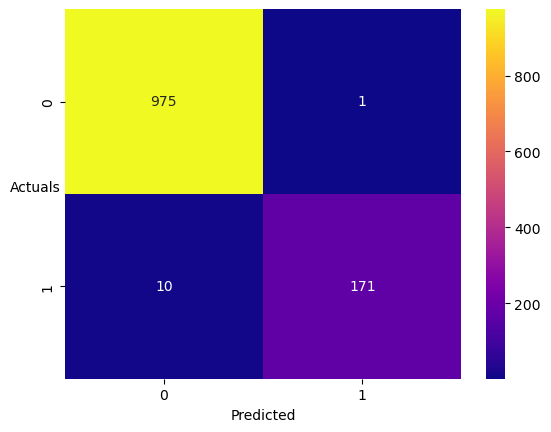

In [35]:
#print(metrics.confusion_matrix(y_test, pred_test))
sns.heatmap((metrics.confusion_matrix(y_test,pred_test)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

# Build a Random Forest Model

In [36]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=42)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Train

In [37]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[2226    0]
 [   0  472]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2226
           1       1.00      1.00      1.00       472

    accuracy                           1.00      2698
   macro avg       1.00      1.00      1.00      2698
weighted avg       1.00      1.00      1.00      2698



Accuracy on the Training Data: 1.000
Confusion Matrix:
[[2226    0]
 [   0  472]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2226
           1       1.00      1.00      1.00       472

    accuracy                           1.00      2698
   macro avg       1.00      1.00      1.00      2698
weighted avg       1.00      1.00      1.00      2698



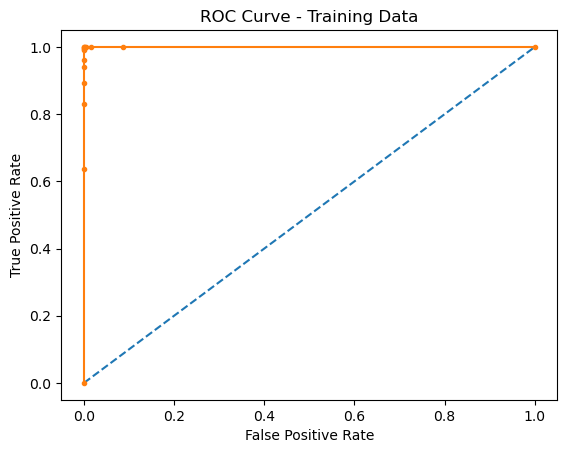

In [38]:
# Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
y_train_prob = RF_model.predict_proba(X_train)[:, 1]  # Predicted probabilities for class 1

model_score = RF_model.score(X_train, y_train)
print("Accuracy on the Training Data: %.3f" % model_score)

print("Confusion Matrix:")
print(metrics.confusion_matrix(y_train, y_train_predict))

print("Classification Report:")
print(metrics.classification_report(y_train, y_train_predict))

# Calculate ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Training Data')
plt.show()

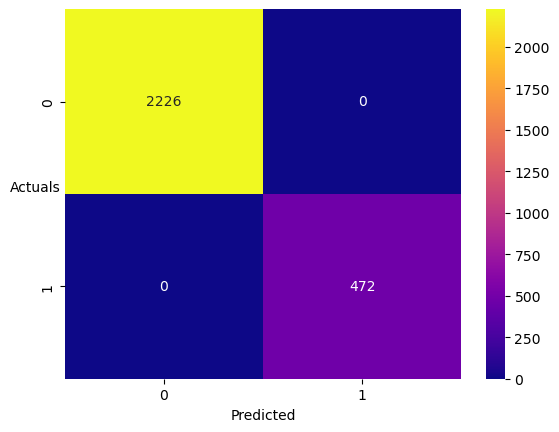

In [39]:
sns.heatmap((metrics.confusion_matrix(y_train, y_train_predict)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

# test

Accuracy on the Test Data: 1.000
Confusion Matrix:
[[976   0]
 [  0 181]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       976
           1       1.00      1.00      1.00       181

    accuracy                           1.00      1157
   macro avg       1.00      1.00      1.00      1157
weighted avg       1.00      1.00      1.00      1157



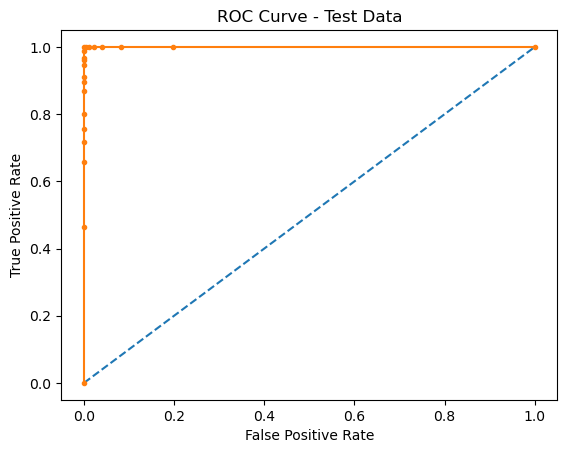

In [40]:
# Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
y_test_prob = RF_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for class 1

model_score = RF_model.score(X_test, y_test)
print("Accuracy on the Test Data: %.3f" % model_score)

print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_test_predict))

print("Classification Report:")
print(metrics.classification_report(y_test, y_test_predict))

# Calculate ROC curve for the test data
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob)

# Plot ROC curve for the test data
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Data')
plt.show()


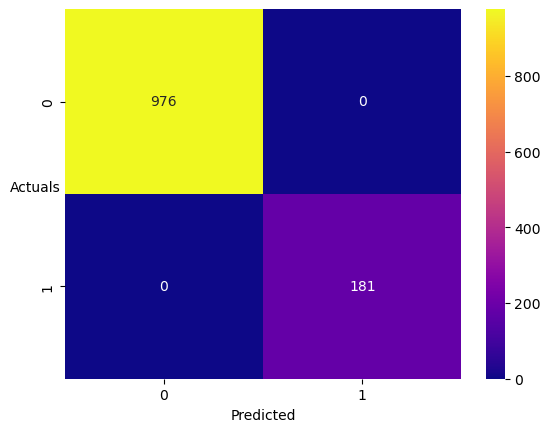

In [41]:
sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

# FOR BOTH TRAIN &TEST Logistic and Random forest

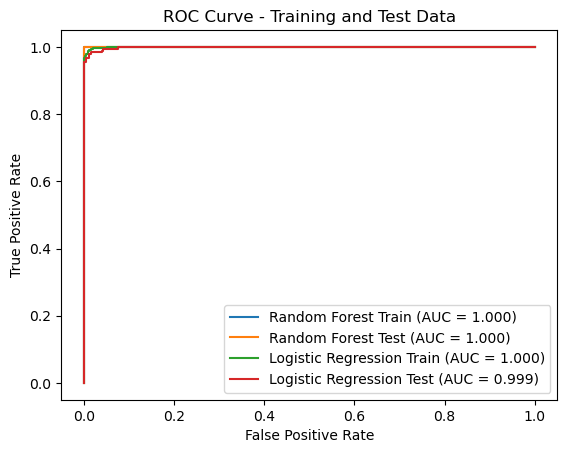

In [42]:
# Import necessary libraries
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate predicted probabilities for each model on training and test data


rf_prob_train = RF_model.predict_proba(X_train)[:, 1]
rf_prob_test = RF_model.predict_proba(X_test)[:, 1]

logreg_prob_train = selector.predict_proba(X_train)[:, 1]
logreg_prob_test = selector.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds for each model on training and test data

rf_fpr_train, rf_tpr_train, _ = roc_curve(y_train, rf_prob_train)
rf_fpr_test, rf_tpr_test, _ = roc_curve(y_test, rf_prob_test)

logreg_fpr_train, logreg_tpr_train, _ = roc_curve(y_train, logreg_prob_train)
logreg_fpr_test, logreg_tpr_test, _ = roc_curve(y_test, logreg_prob_test)

# Calculate AUC scores for each model on training and test data

rf_auc_train = roc_auc_score(y_train, rf_prob_train)
rf_auc_test = roc_auc_score(y_test, rf_prob_test)

logreg_auc_train = roc_auc_score(y_train, logreg_prob_train)
logreg_auc_test = roc_auc_score(y_test, logreg_prob_test)

# Plot ROC curves for each model on training and test data

plt.plot(rf_fpr_train, rf_tpr_train, label=f'Random Forest Train (AUC = {rf_auc_train:.3f})')
plt.plot(rf_fpr_test, rf_tpr_test, label=f'Random Forest Test (AUC = {rf_auc_test:.3f})')

plt.plot(logreg_fpr_train, logreg_tpr_train, label=f'Logistic Regression Train (AUC = {logreg_auc_train:.3f})')
plt.plot(logreg_fpr_test, logreg_tpr_test, label=f'Logistic Regression Test (AUC = {logreg_auc_test:.3f})')

# Set labels and title for the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Training and Test Data')

# Set legend and show the plot
plt.legend(loc='best')
plt.show()


# The Random Forest model demonstrates excellent performance on both the training and test datasets. It achieves perfect accuracy, precision, recall, and F1-scores, indicating that it is highly effective at predicting the paid status. However, it's important to consider whether such a high level of accuracy is realistic and whether the model is overfitting to the training data.  Regular validation and monitoring of the model's performance are necessary to ensure its reliability.




